## Импорт библиотек

In [45]:
import numpy as np
import matplotlib.pyplot as plt

Для нормального отображение графиков в VsCode

In [46]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Fix image
plt.rcdefaults()

## Загружаем датасет

In [47]:
dataset = []

with open("./data/task4.dat") as f:
    for line in f:
        dataset.append(float(line.replace('\n', '')))

dataset = np.array(dataset)
x = np.arange(dataset.size, dtype='float64')


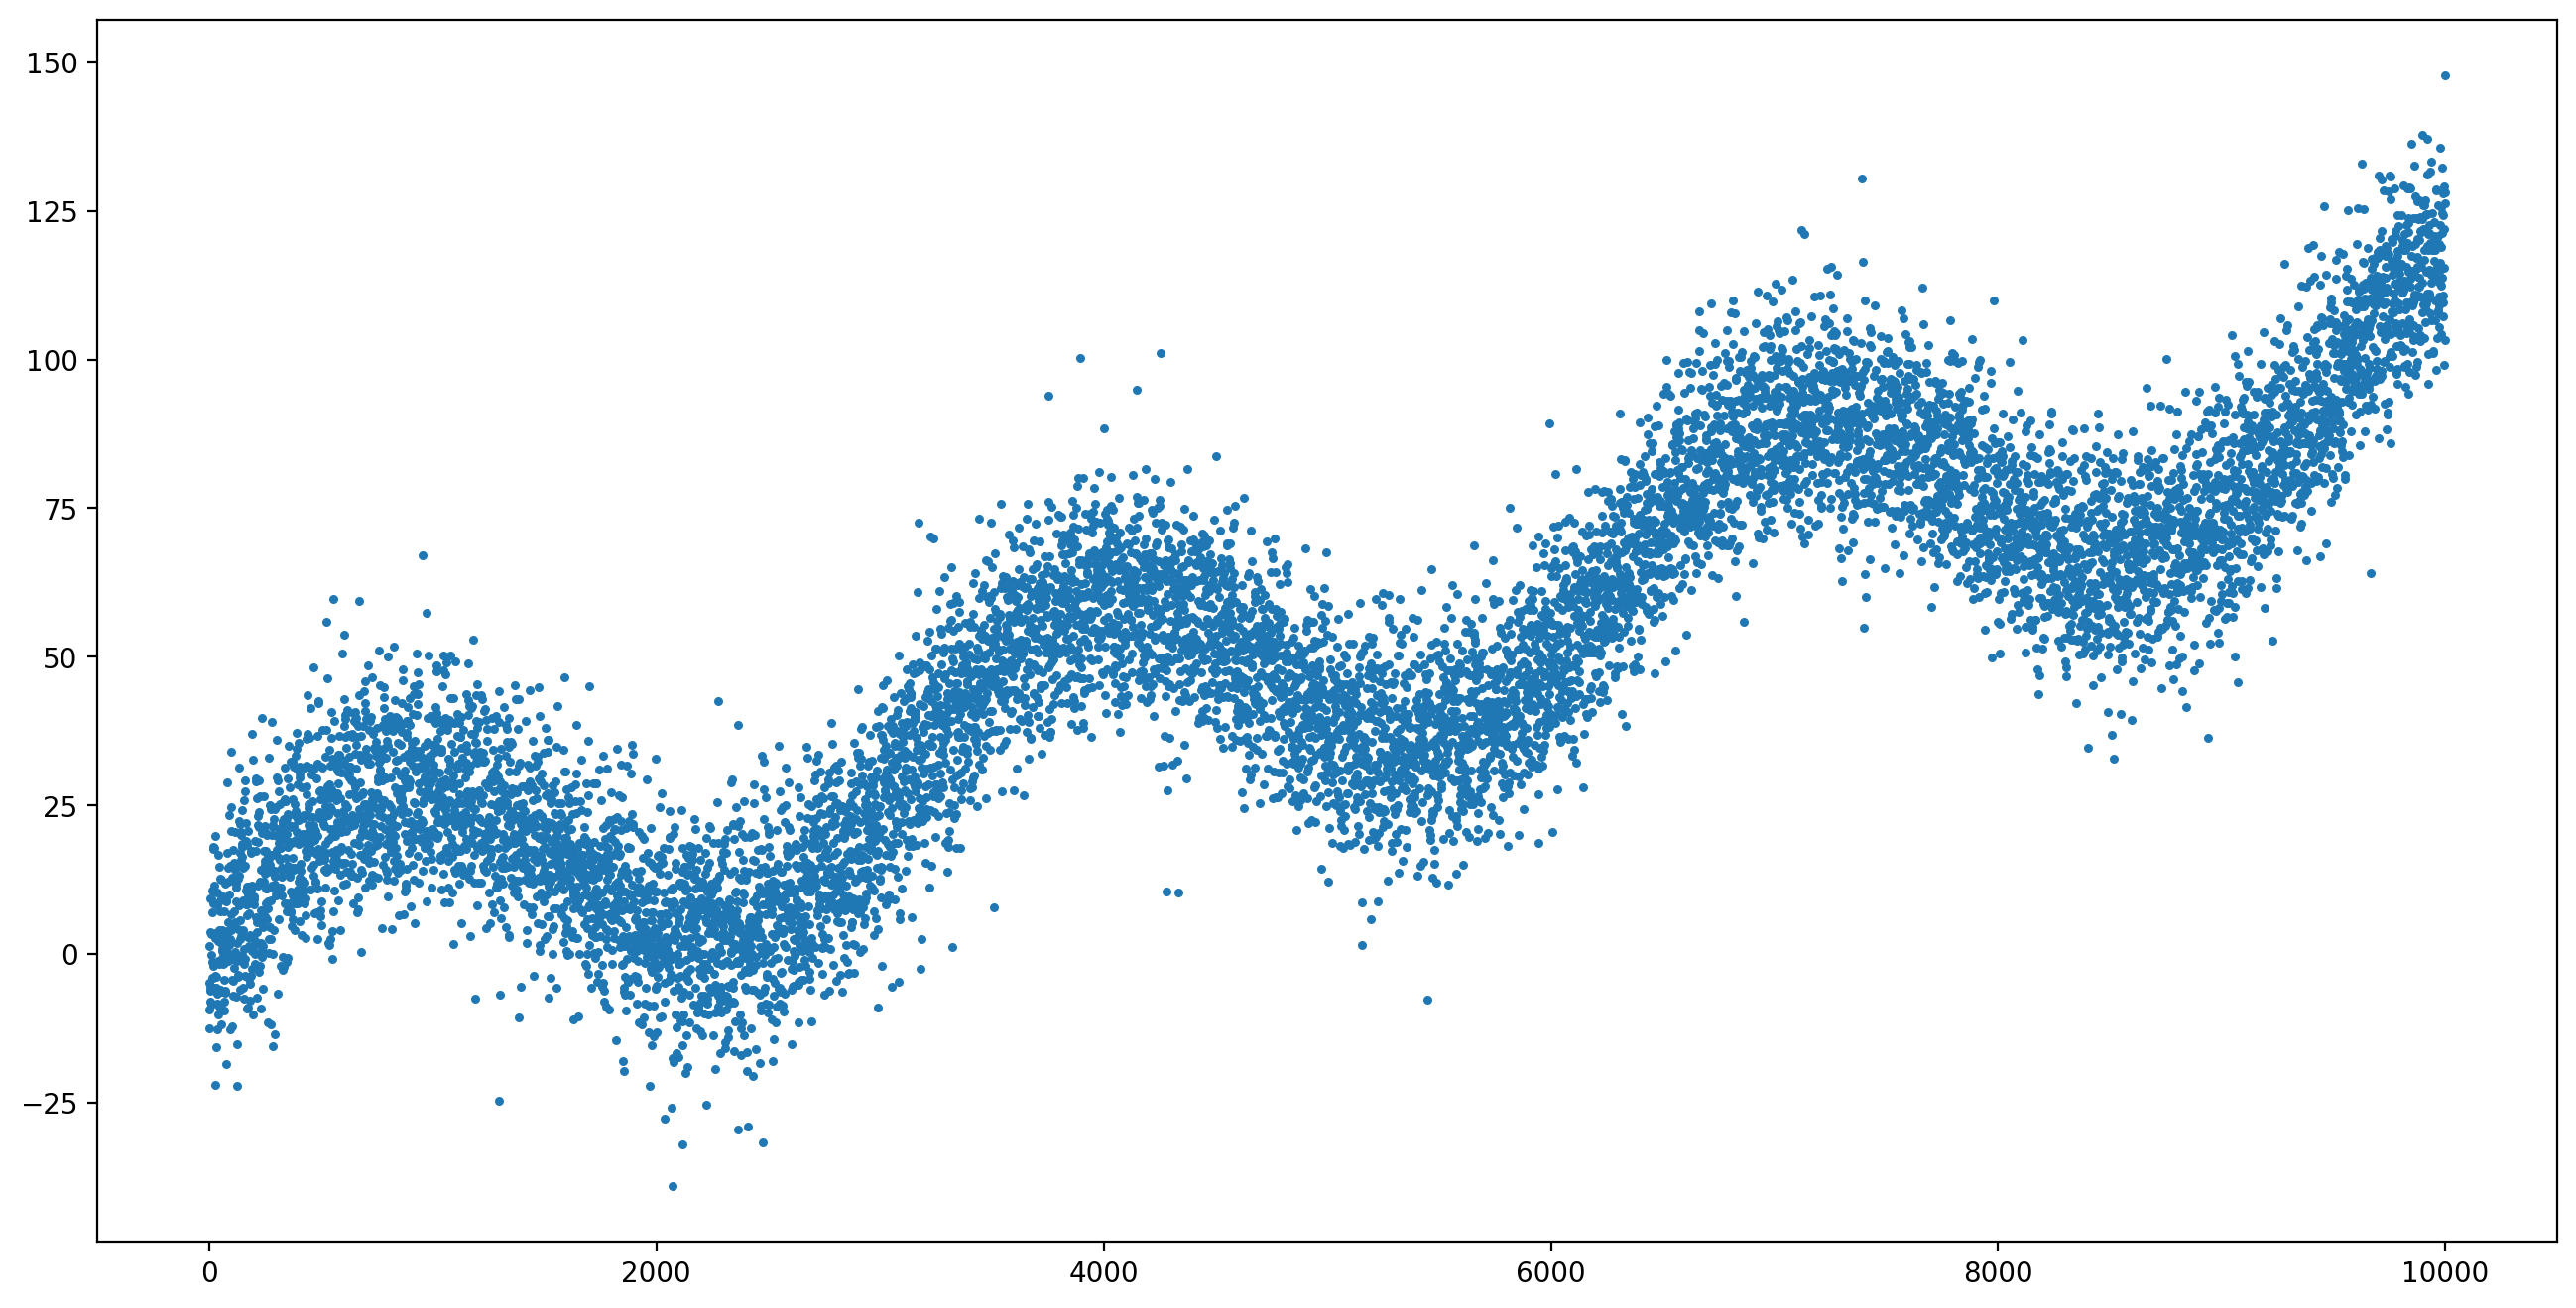

In [48]:
plt.figure(figsize=(16, 8))
plt.scatter(x, dataset, s=5)
plt.show()


In [49]:
t = np.linspace(0,100,10000)
print(t)

print(x)

[0.00000000e+00 1.00010001e-02 2.00020002e-02 ... 9.99799980e+01
 9.99899990e+01 1.00000000e+02]
[0.000e+00 1.000e+00 2.000e+00 ... 9.997e+03 9.998e+03 9.999e+03]


## Вырезаем линейный тренд

In [50]:
def f(i, t):
    return 1 if i == 0 else t


def rotary_array(t, y):
    A = np.zeros((2, 2))
    B = np.zeros(2)

    for k, x in enumerate(t):
        for i in range(2):
            B[i] += f(i, x) * y[k]
            for j in range(2):
                A[i, j] += f(i, x) * f(j, x)

    coefs = np.linalg.solve(A, B)
    print(coefs)
    t_c = coefs[0] + t*coefs[1]
    return y - t_c


In [51]:
dataset_rot = rotary_array(x, dataset)

[4.73509265 0.00917195]


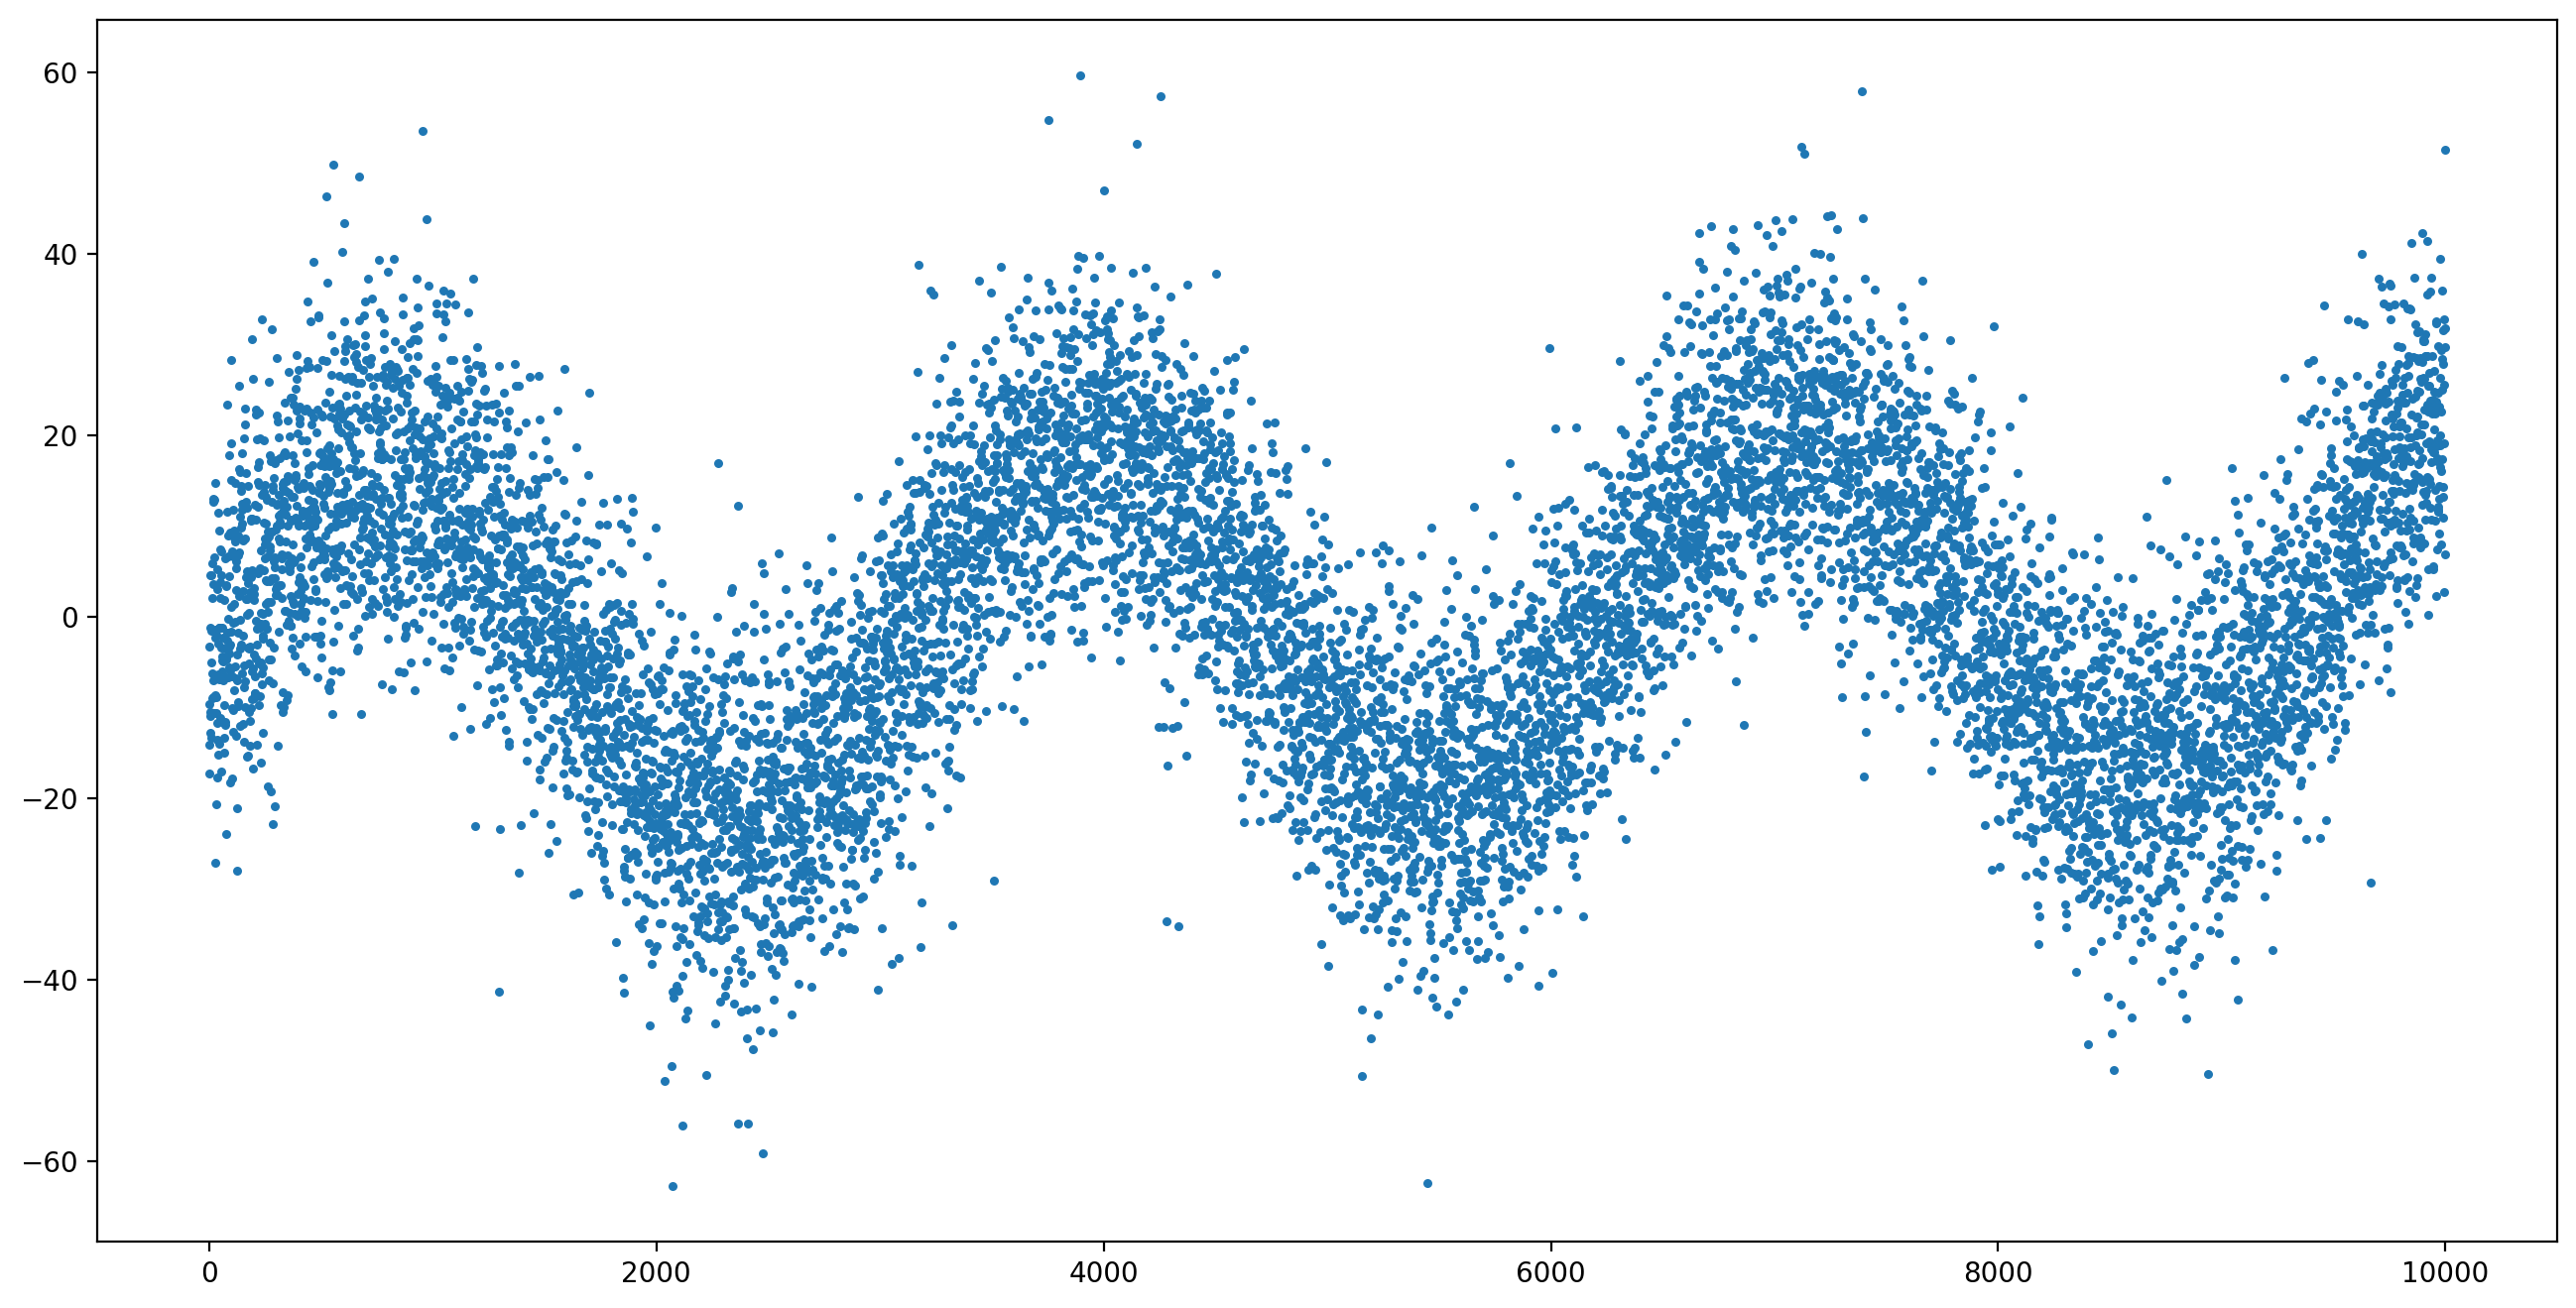

In [52]:
plt.figure(figsize=(16, 8))
plt.scatter(x, dataset_rot, s=5)
plt.show()


## Разделяем датасет

In [53]:
dataset_rot_split = np.split(dataset_rot, 10)


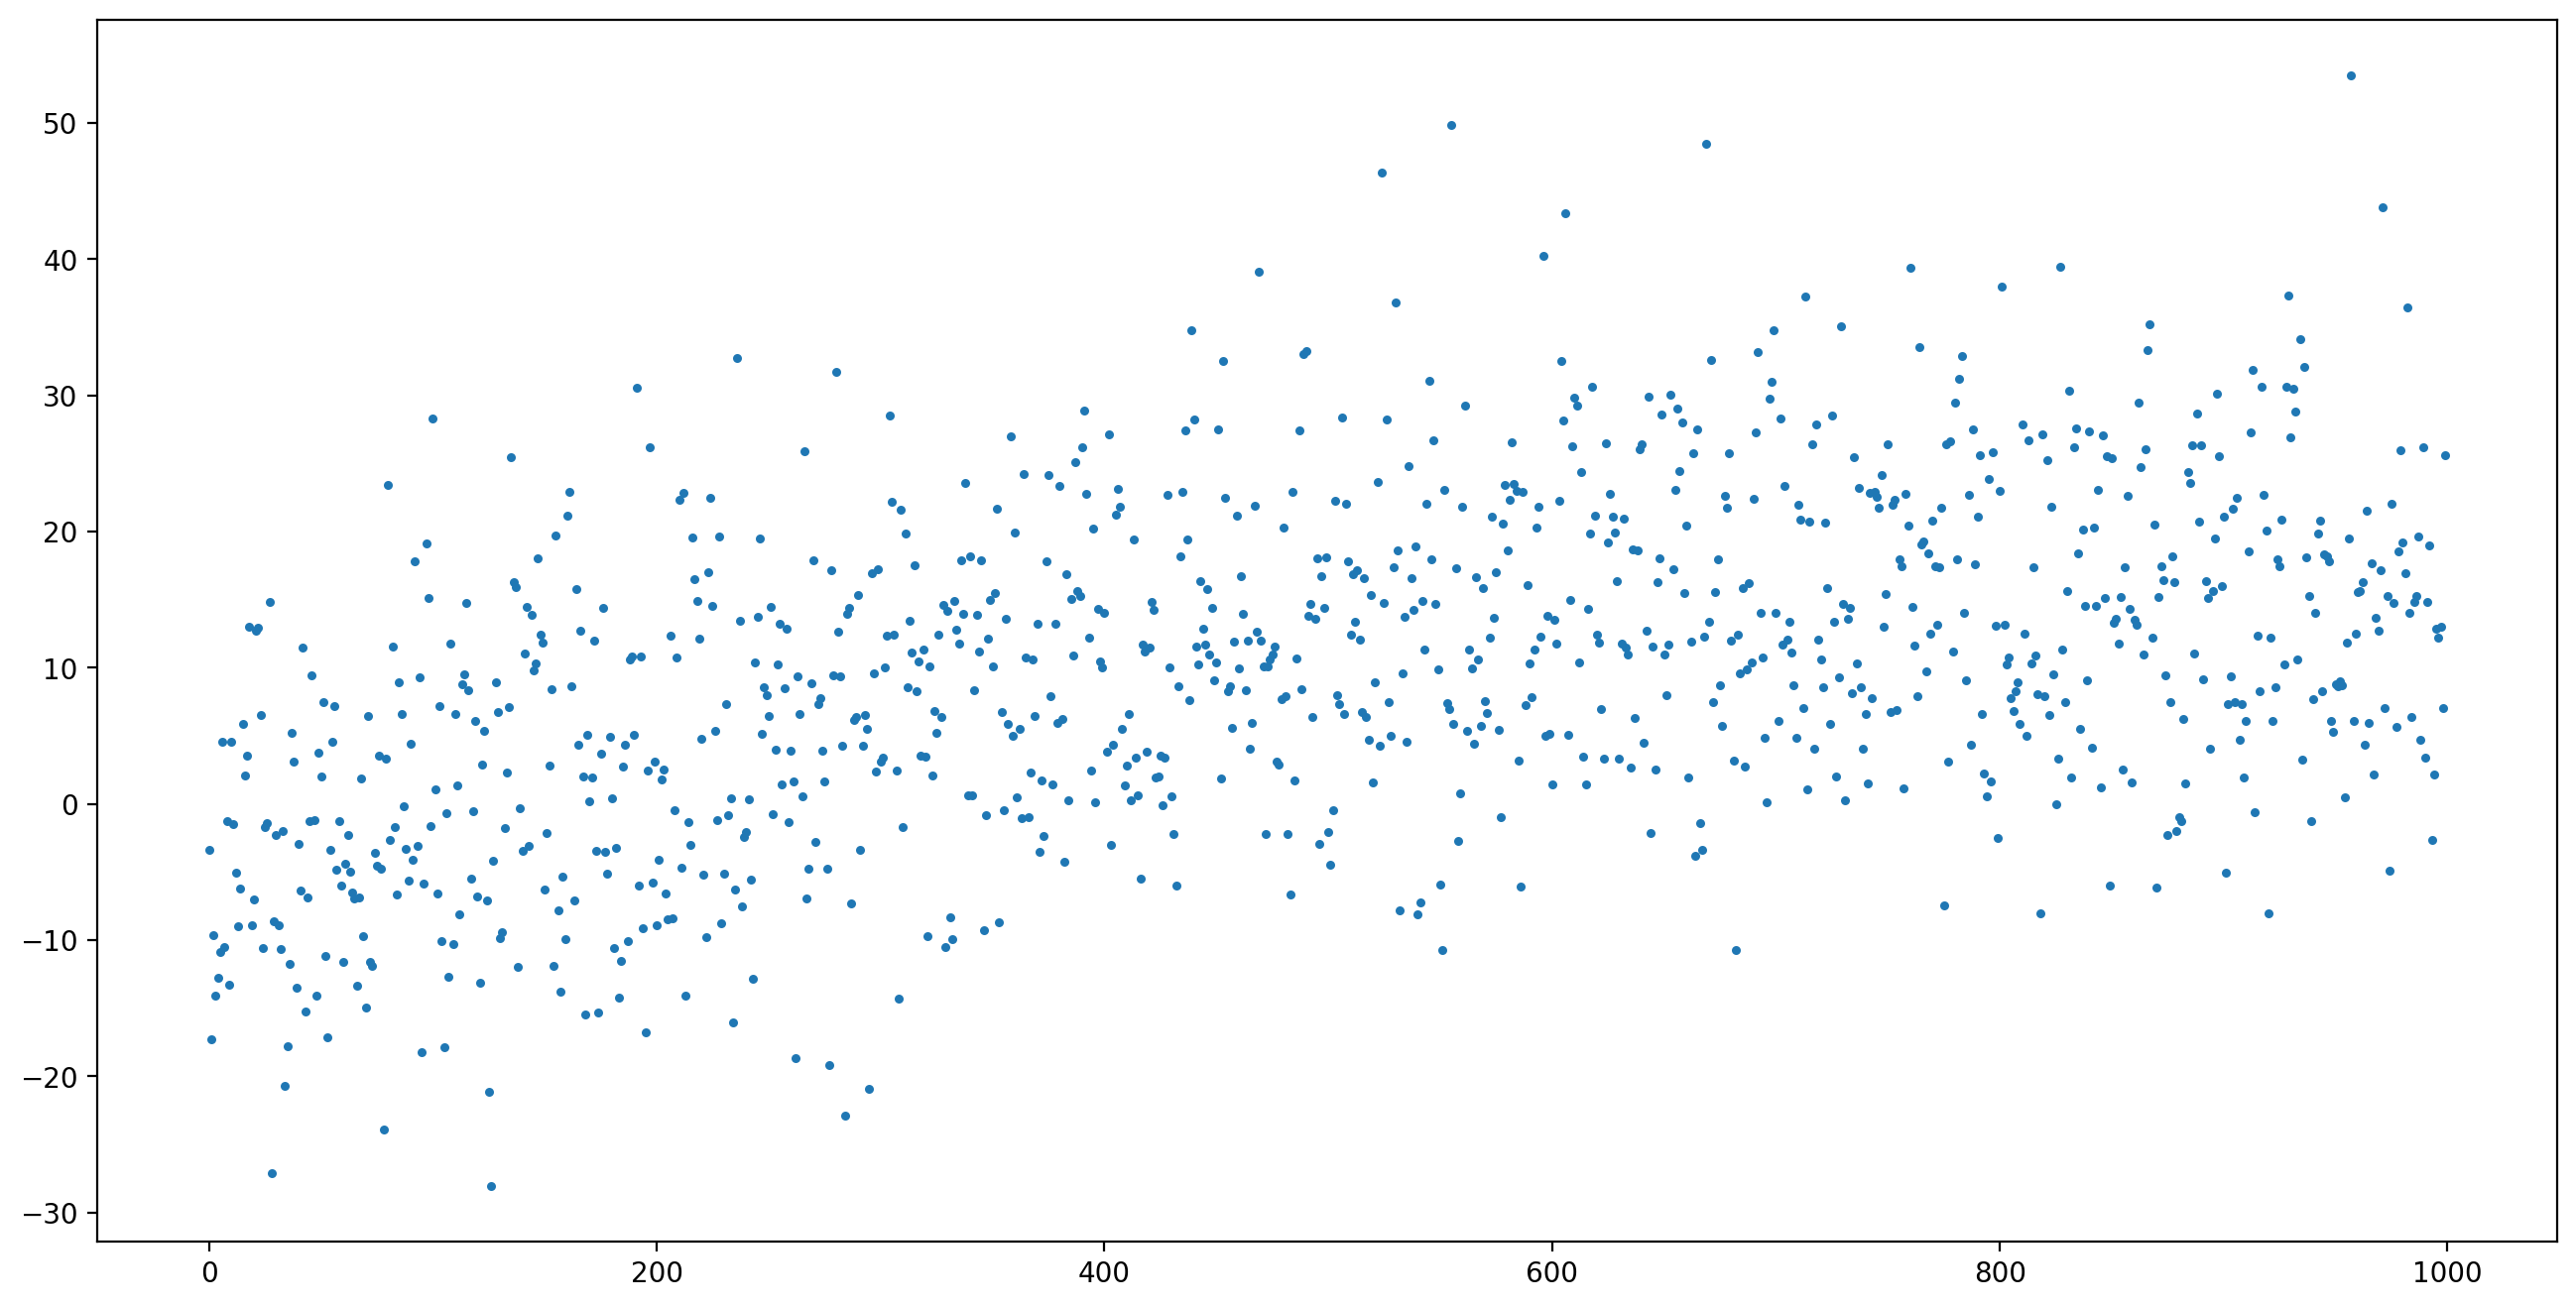

In [54]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(
    dataset_rot_split[0].size, dtype='float64'), dataset_rot_split[0], s=5)
plt.show()


## Ищем среднее крадратичное отклонение у первого части датасета

In [55]:
# Расчитываем статистику ищем среднее и стандартное отклонение
data_mean, data_std = np.mean(
    dataset_rot_split[0]), np.std(dataset_rot_split[0])
print(f"Data mean: {data_mean}\nData std: {data_std}")

# Выявляем отклонения
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off
print(f"lower: {lower}\nupper: {upper}")


Data mean: 9.939648670701885
Data std: 12.13485031389789
lower: -14.330051957093893
upper: 34.20934929849766


In [56]:
# Делаем 2 массива с одинаковыми размерами.
# В одном датасете одни выбросы в другом удалены только выбросы

outliers = []
outliers_removed = []

for x in dataset_rot_split[0]:
    if x < lower or x > upper:
        outliers.append(x)
    else:
        outliers.append(None)


for x in dataset_rot_split[0]:
    if x > lower or x < upper:
        outliers_removed.append(x)
    else:
        outliers.append(None)

outliers = np.array(outliers)
outliers_removed = np.array(outliers_removed)


## Смотрим результат

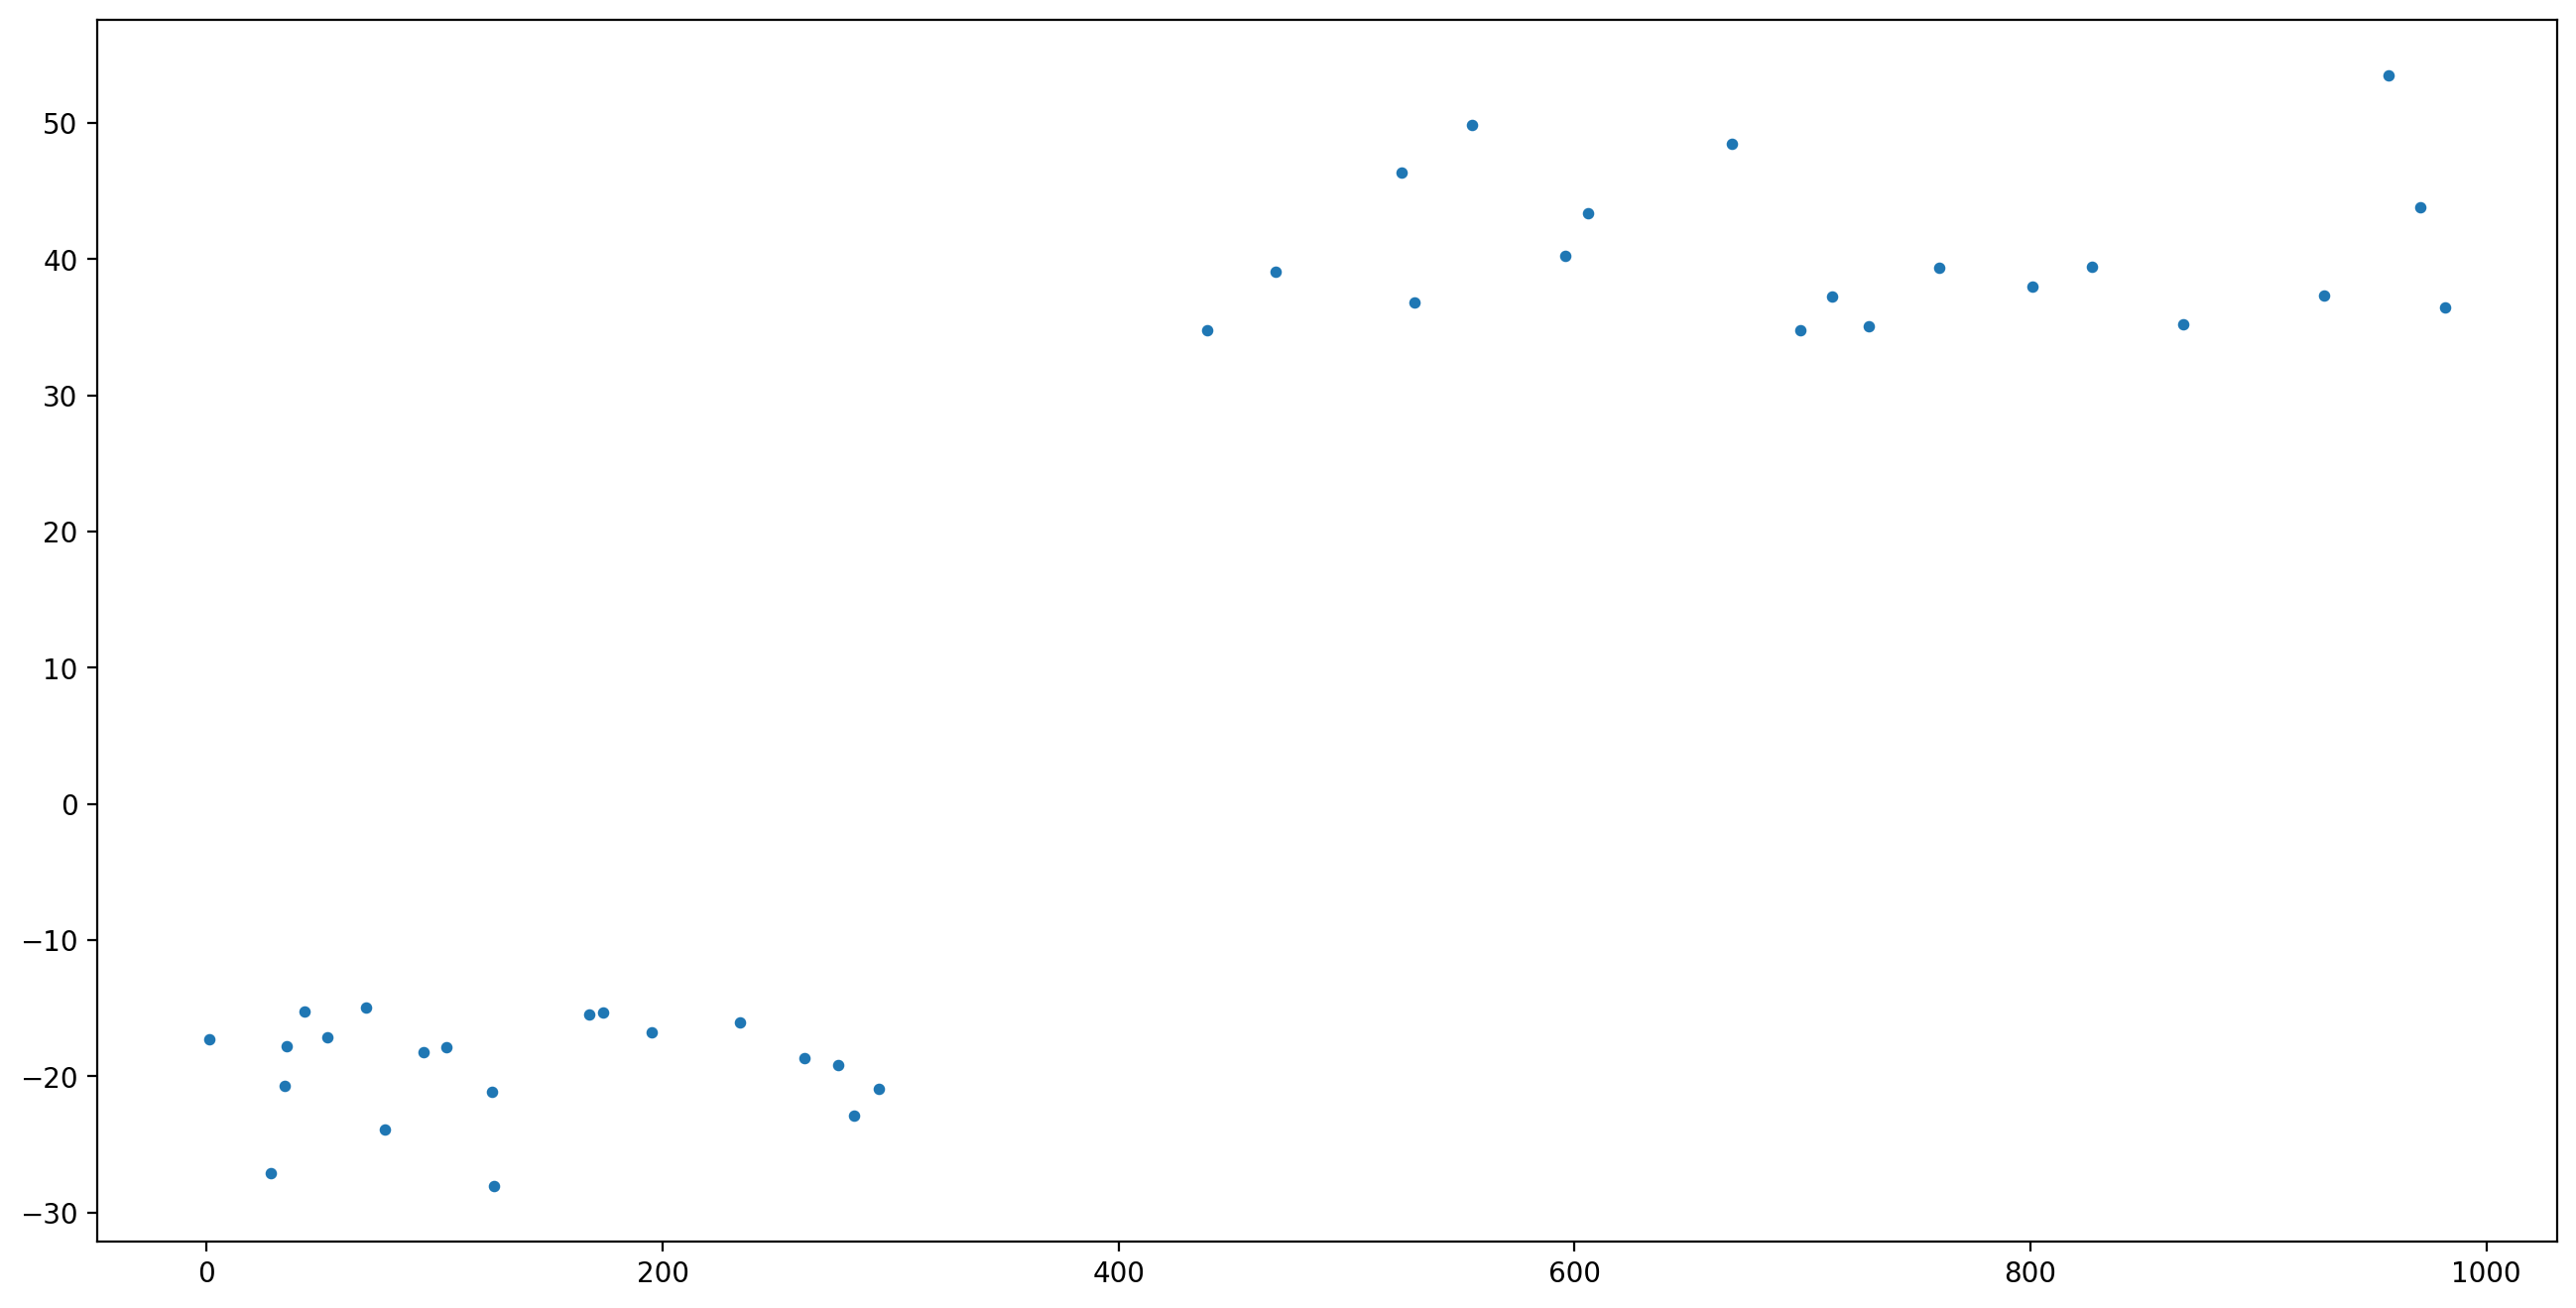

In [57]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(outliers.size, dtype='float64'), outliers, s=10)
plt.show()


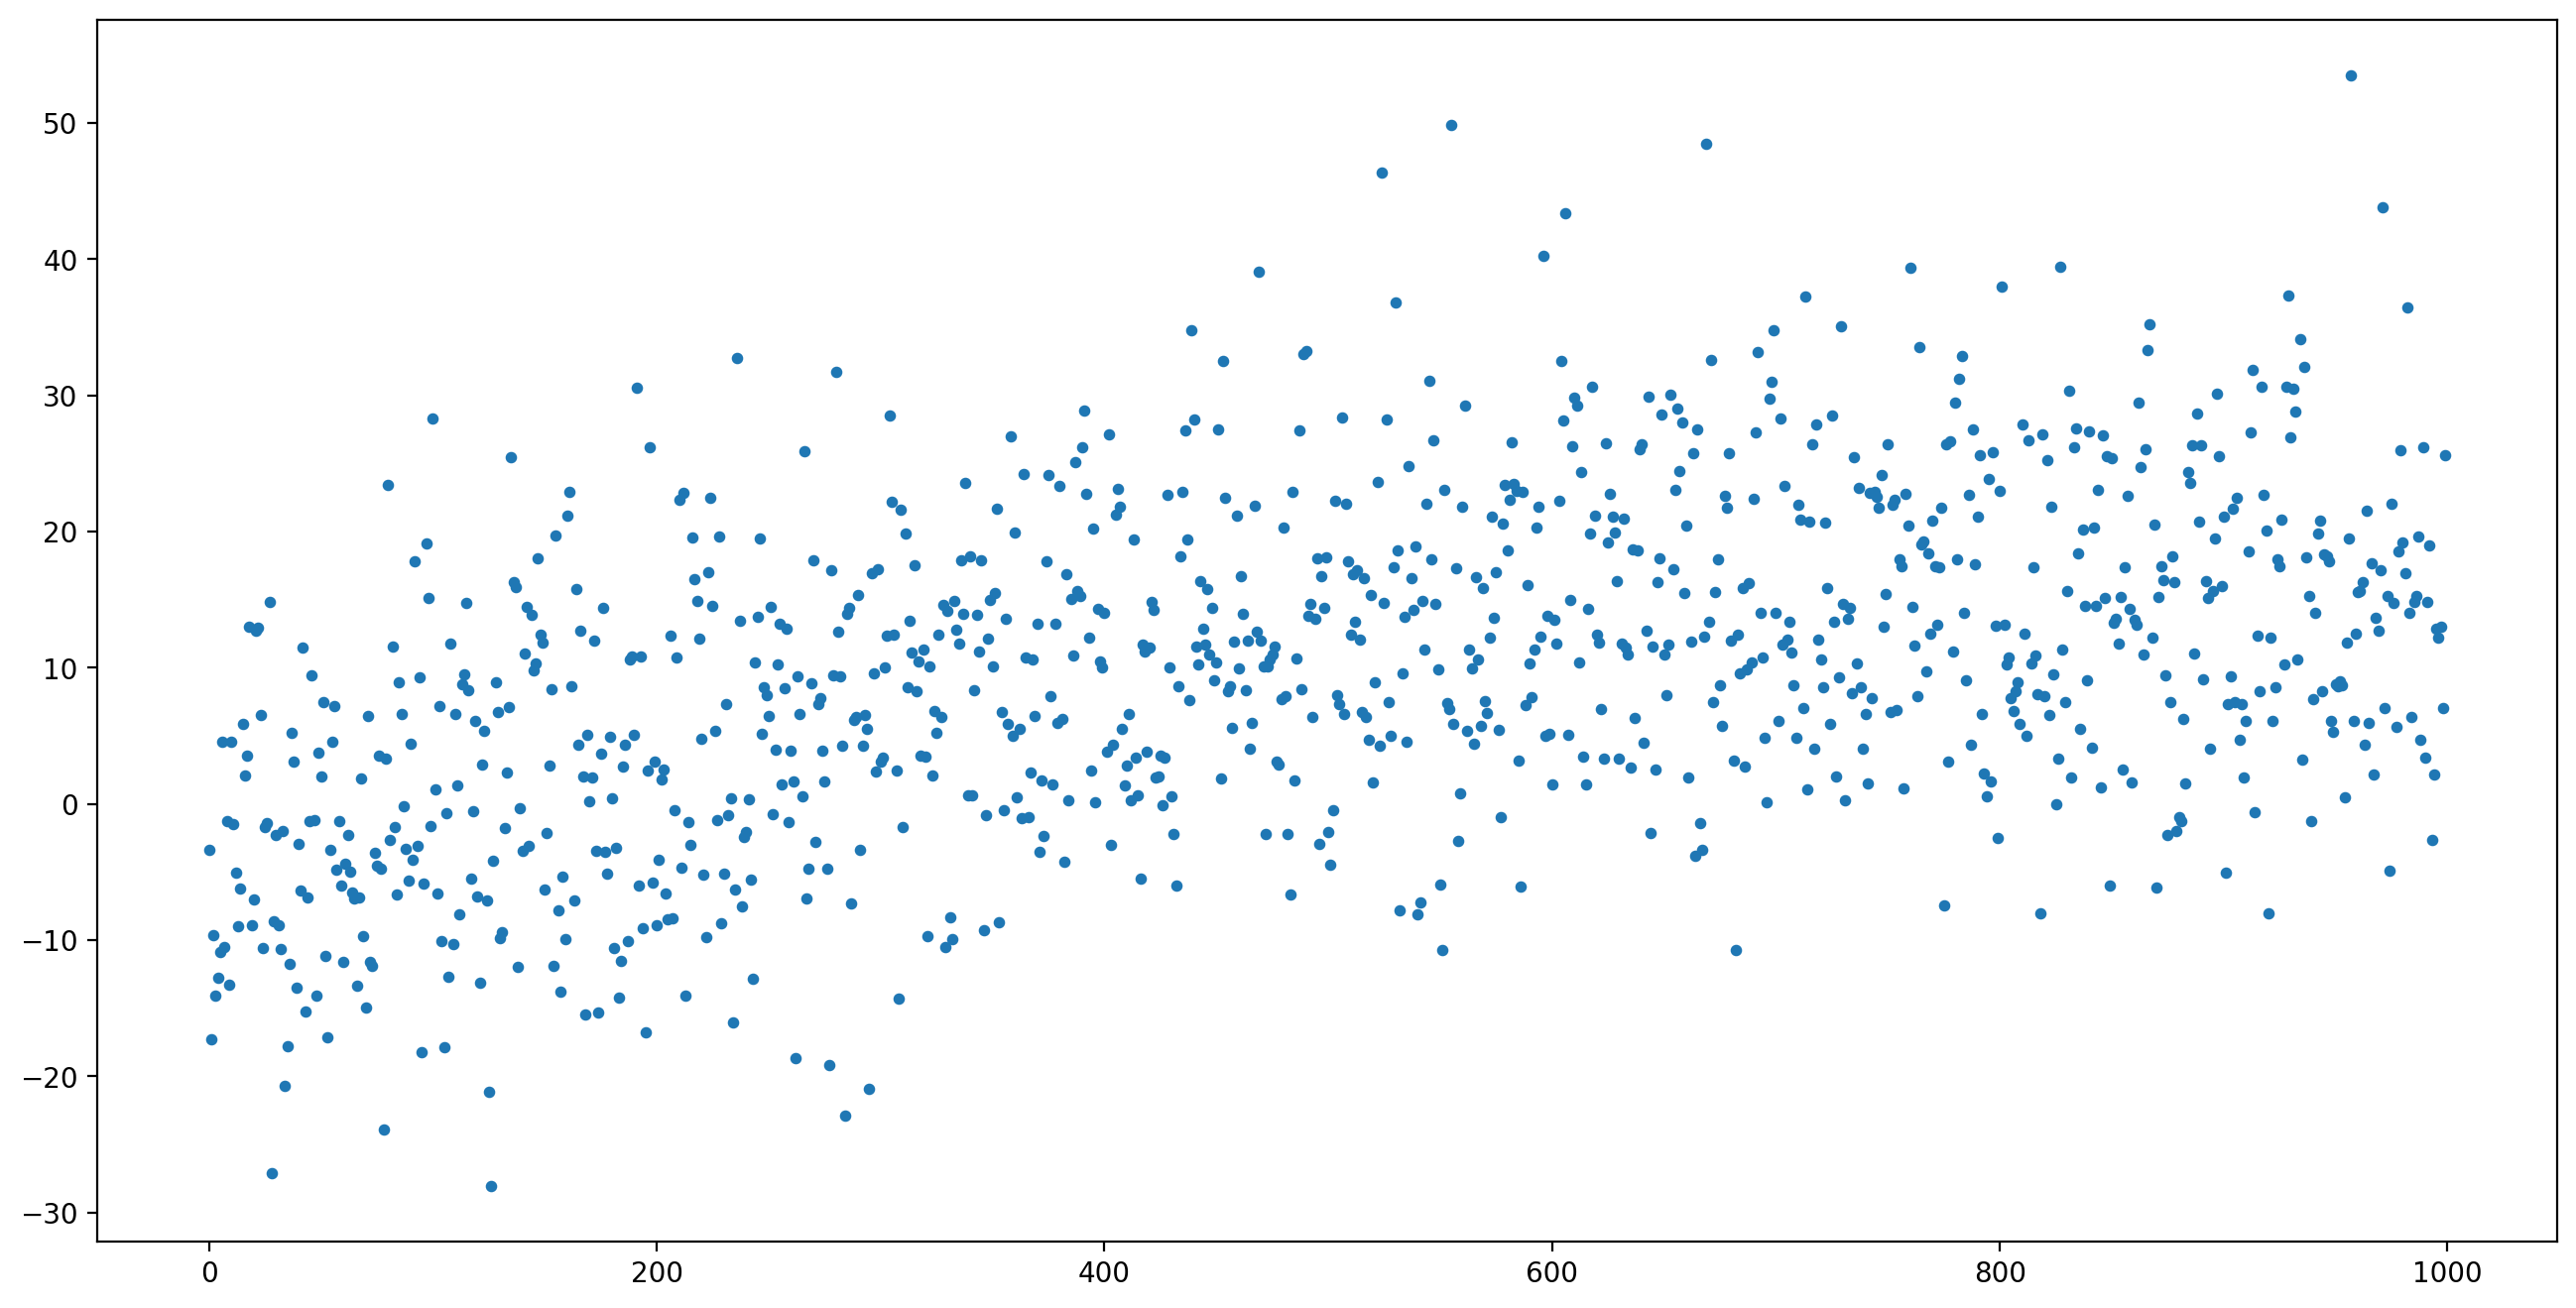

In [58]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(outliers_removed.size, dtype='float64'),
            outliers_removed, s=10)
plt.show()


## Делаем функцию для удаление выборов всего датасета
Как параметры мы передаем весь датасет и на сколько процентов поделить датасет

In [59]:
def removing_outliers(dataset: np.ndarray, percentage_separation: float):
    outliers = []
    outliers_removed = []

    dataset_rot_split = np.array(np.split(dataset, int(
        dataset.size * (percentage_separation * 100) / 100)))

    for data in dataset_rot_split:

        # Расчитываем статистику ищем среднее и стандартное отклонение
        data_mean, data_std = np.mean(data), np.std(data)
        # print(f"Data mean: {data_mean}\nData std: {data_std}")

        # Выявляем отклонения
        cut_off = data_std * 2
        lower, upper = data_mean - cut_off, data_mean + cut_off
        # print(f"lower: {lower}\nupper: {upper}")

        for x in data:
            if x < lower or x > upper:
                outliers.append(x)
            else:
                outliers.append(None)

            if x > lower and x < upper:
                outliers_removed.append(x)
            else:
                outliers_removed.append(None)

    print("ok")

    return np.array(outliers), np.array(outliers_removed)


In [60]:
dataset_outliers, dataset_outliers_removed = removing_outliers(
    dataset_rot, 0.01)


ok


## Результат

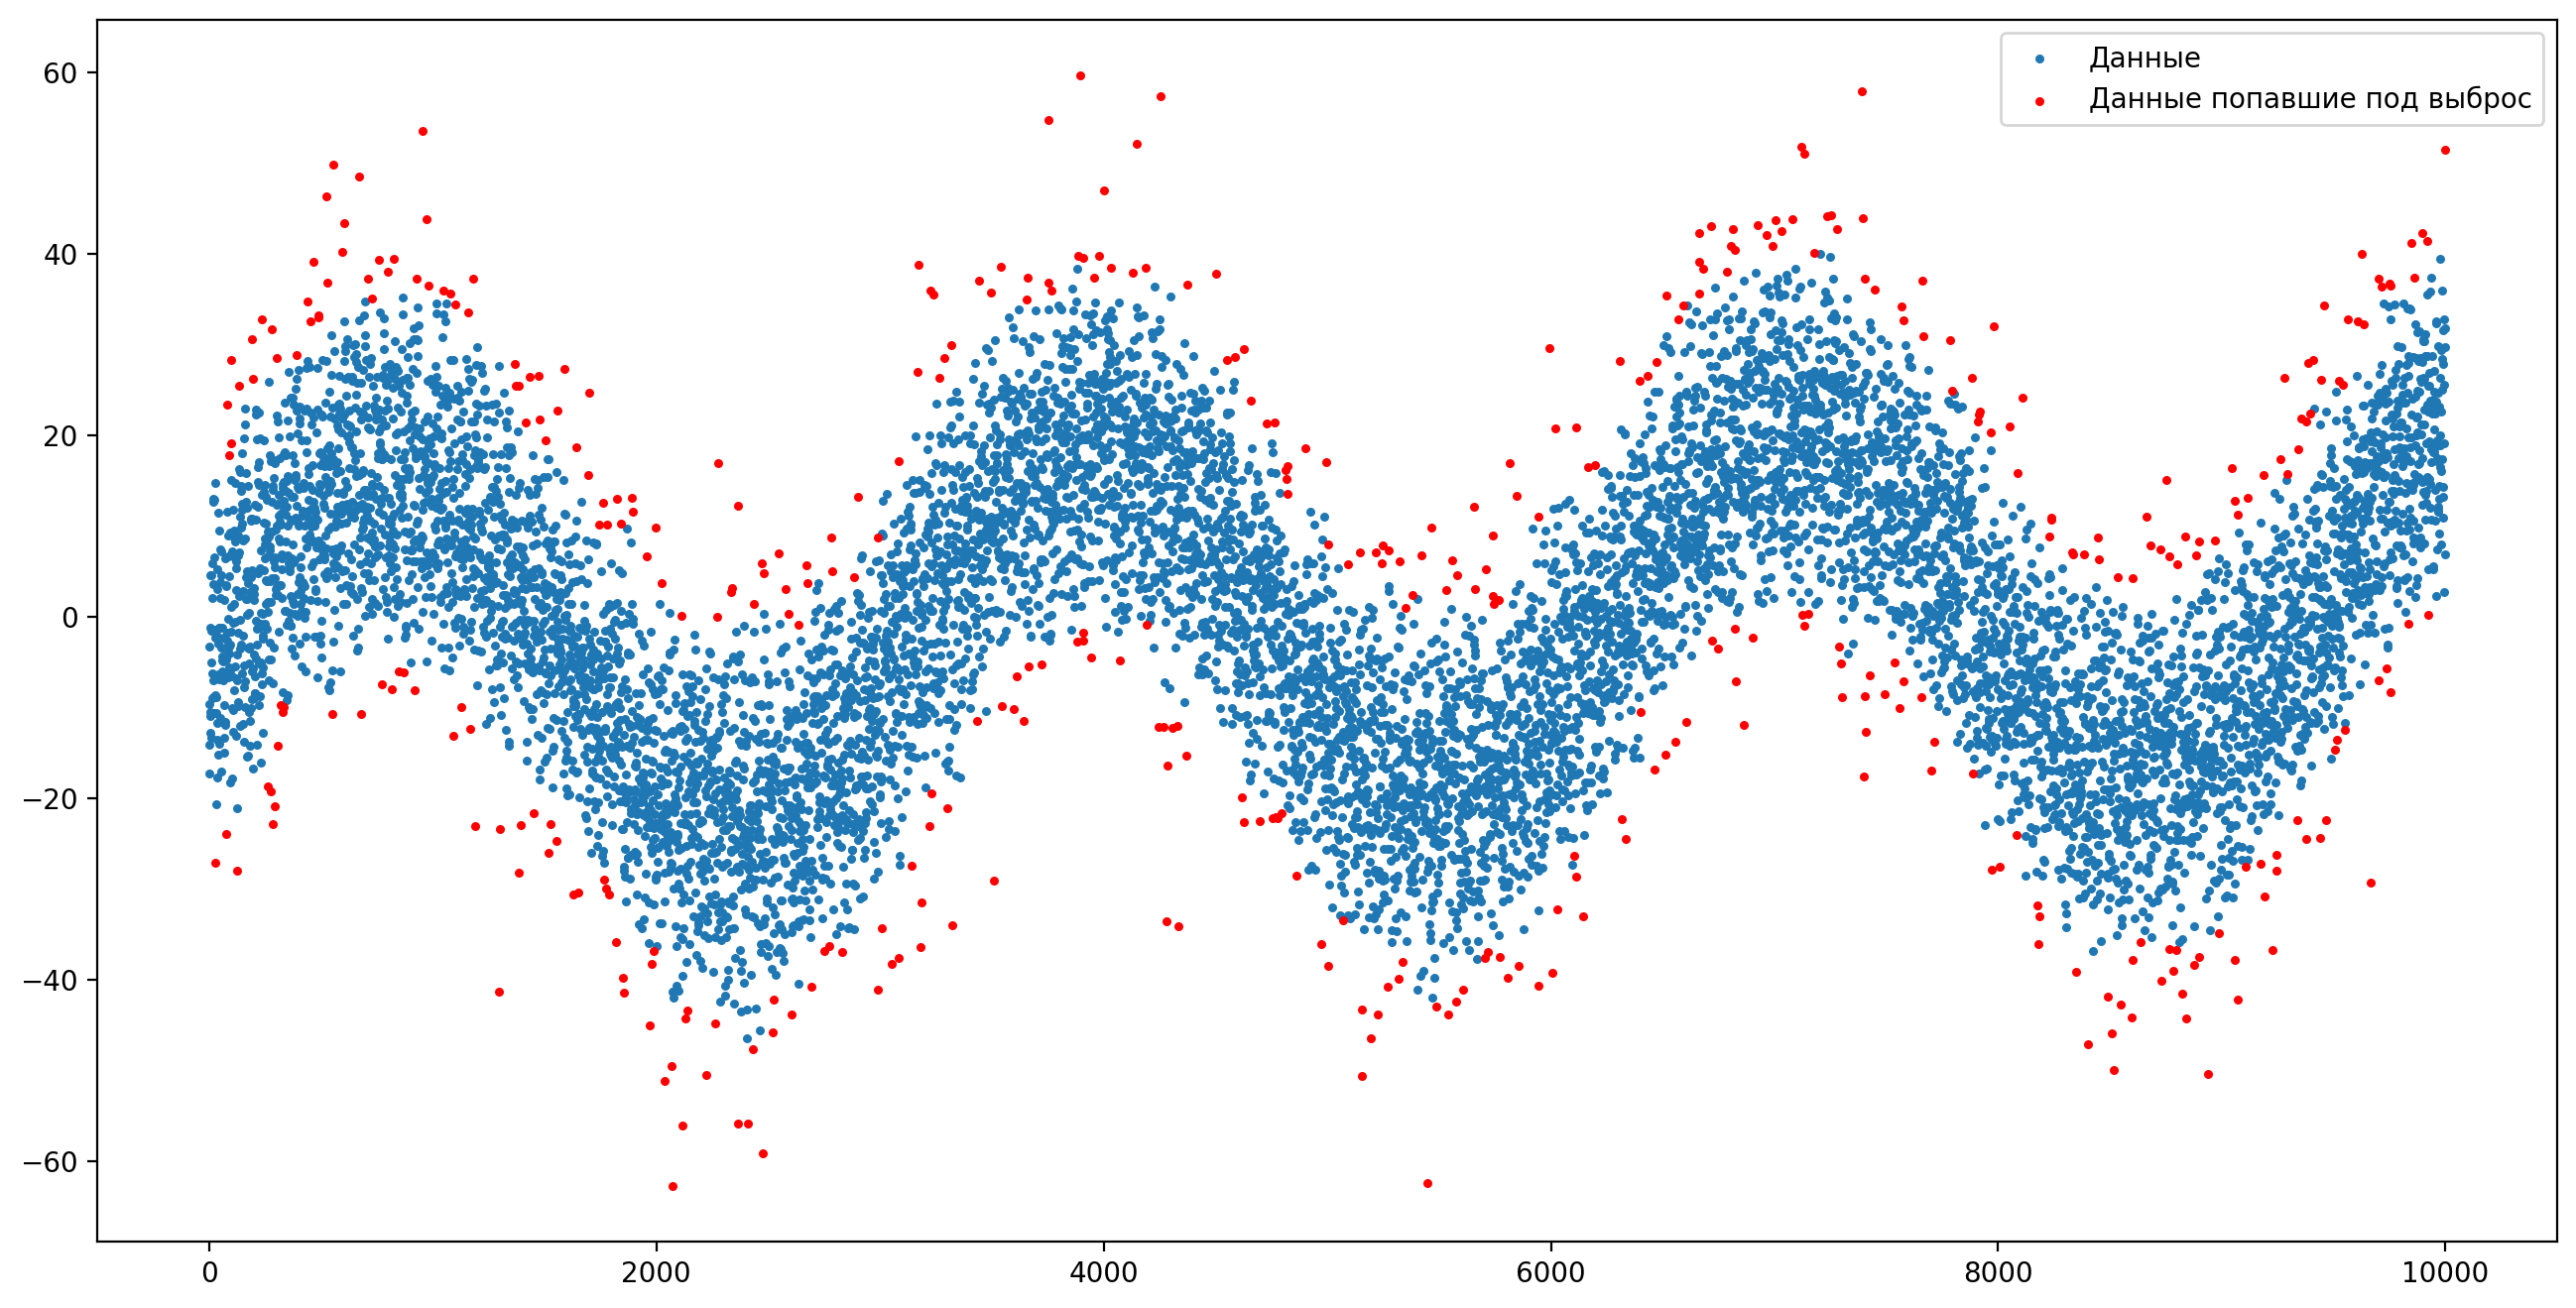

In [61]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(dataset_outliers_removed.size, dtype='float64'),
            dataset_outliers_removed, s=5, label='Данные')
plt.scatter(np.arange(dataset_outliers.size, dtype='float64'),
            dataset_outliers, s=5, label='Данные попавшие под выброс', color='red')
plt.legend()
plt.show()


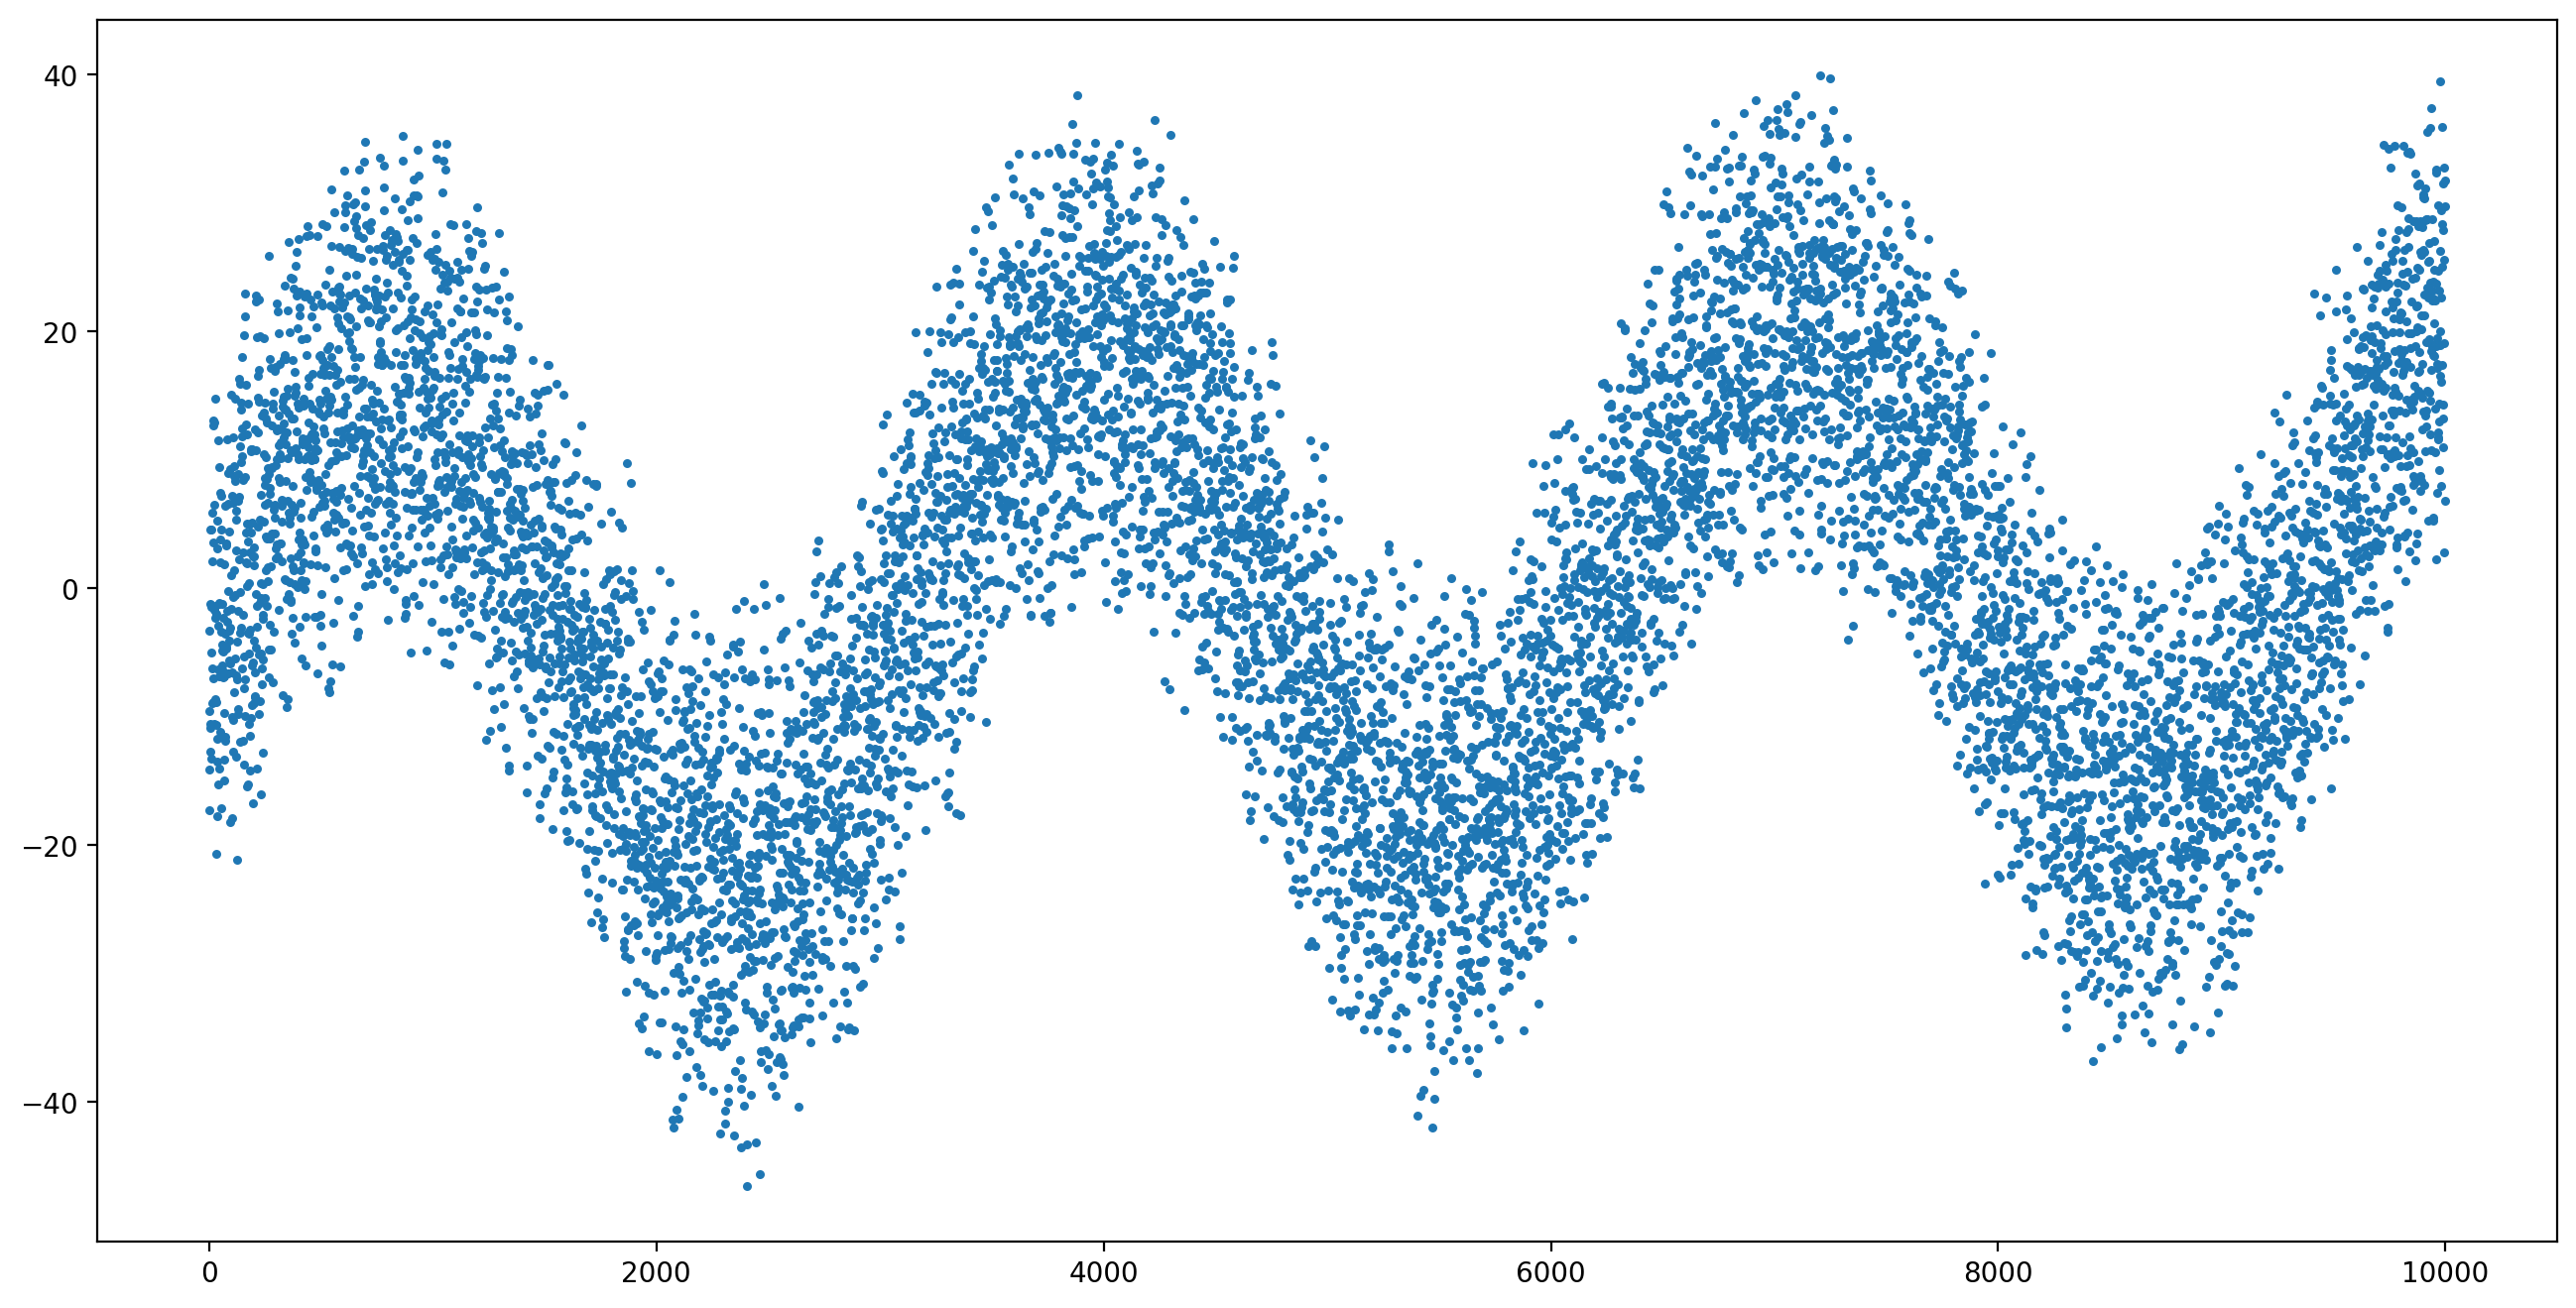

In [62]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(dataset_outliers_removed.size, dtype='float64'),
            dataset_outliers_removed, s=5, label='Данные')


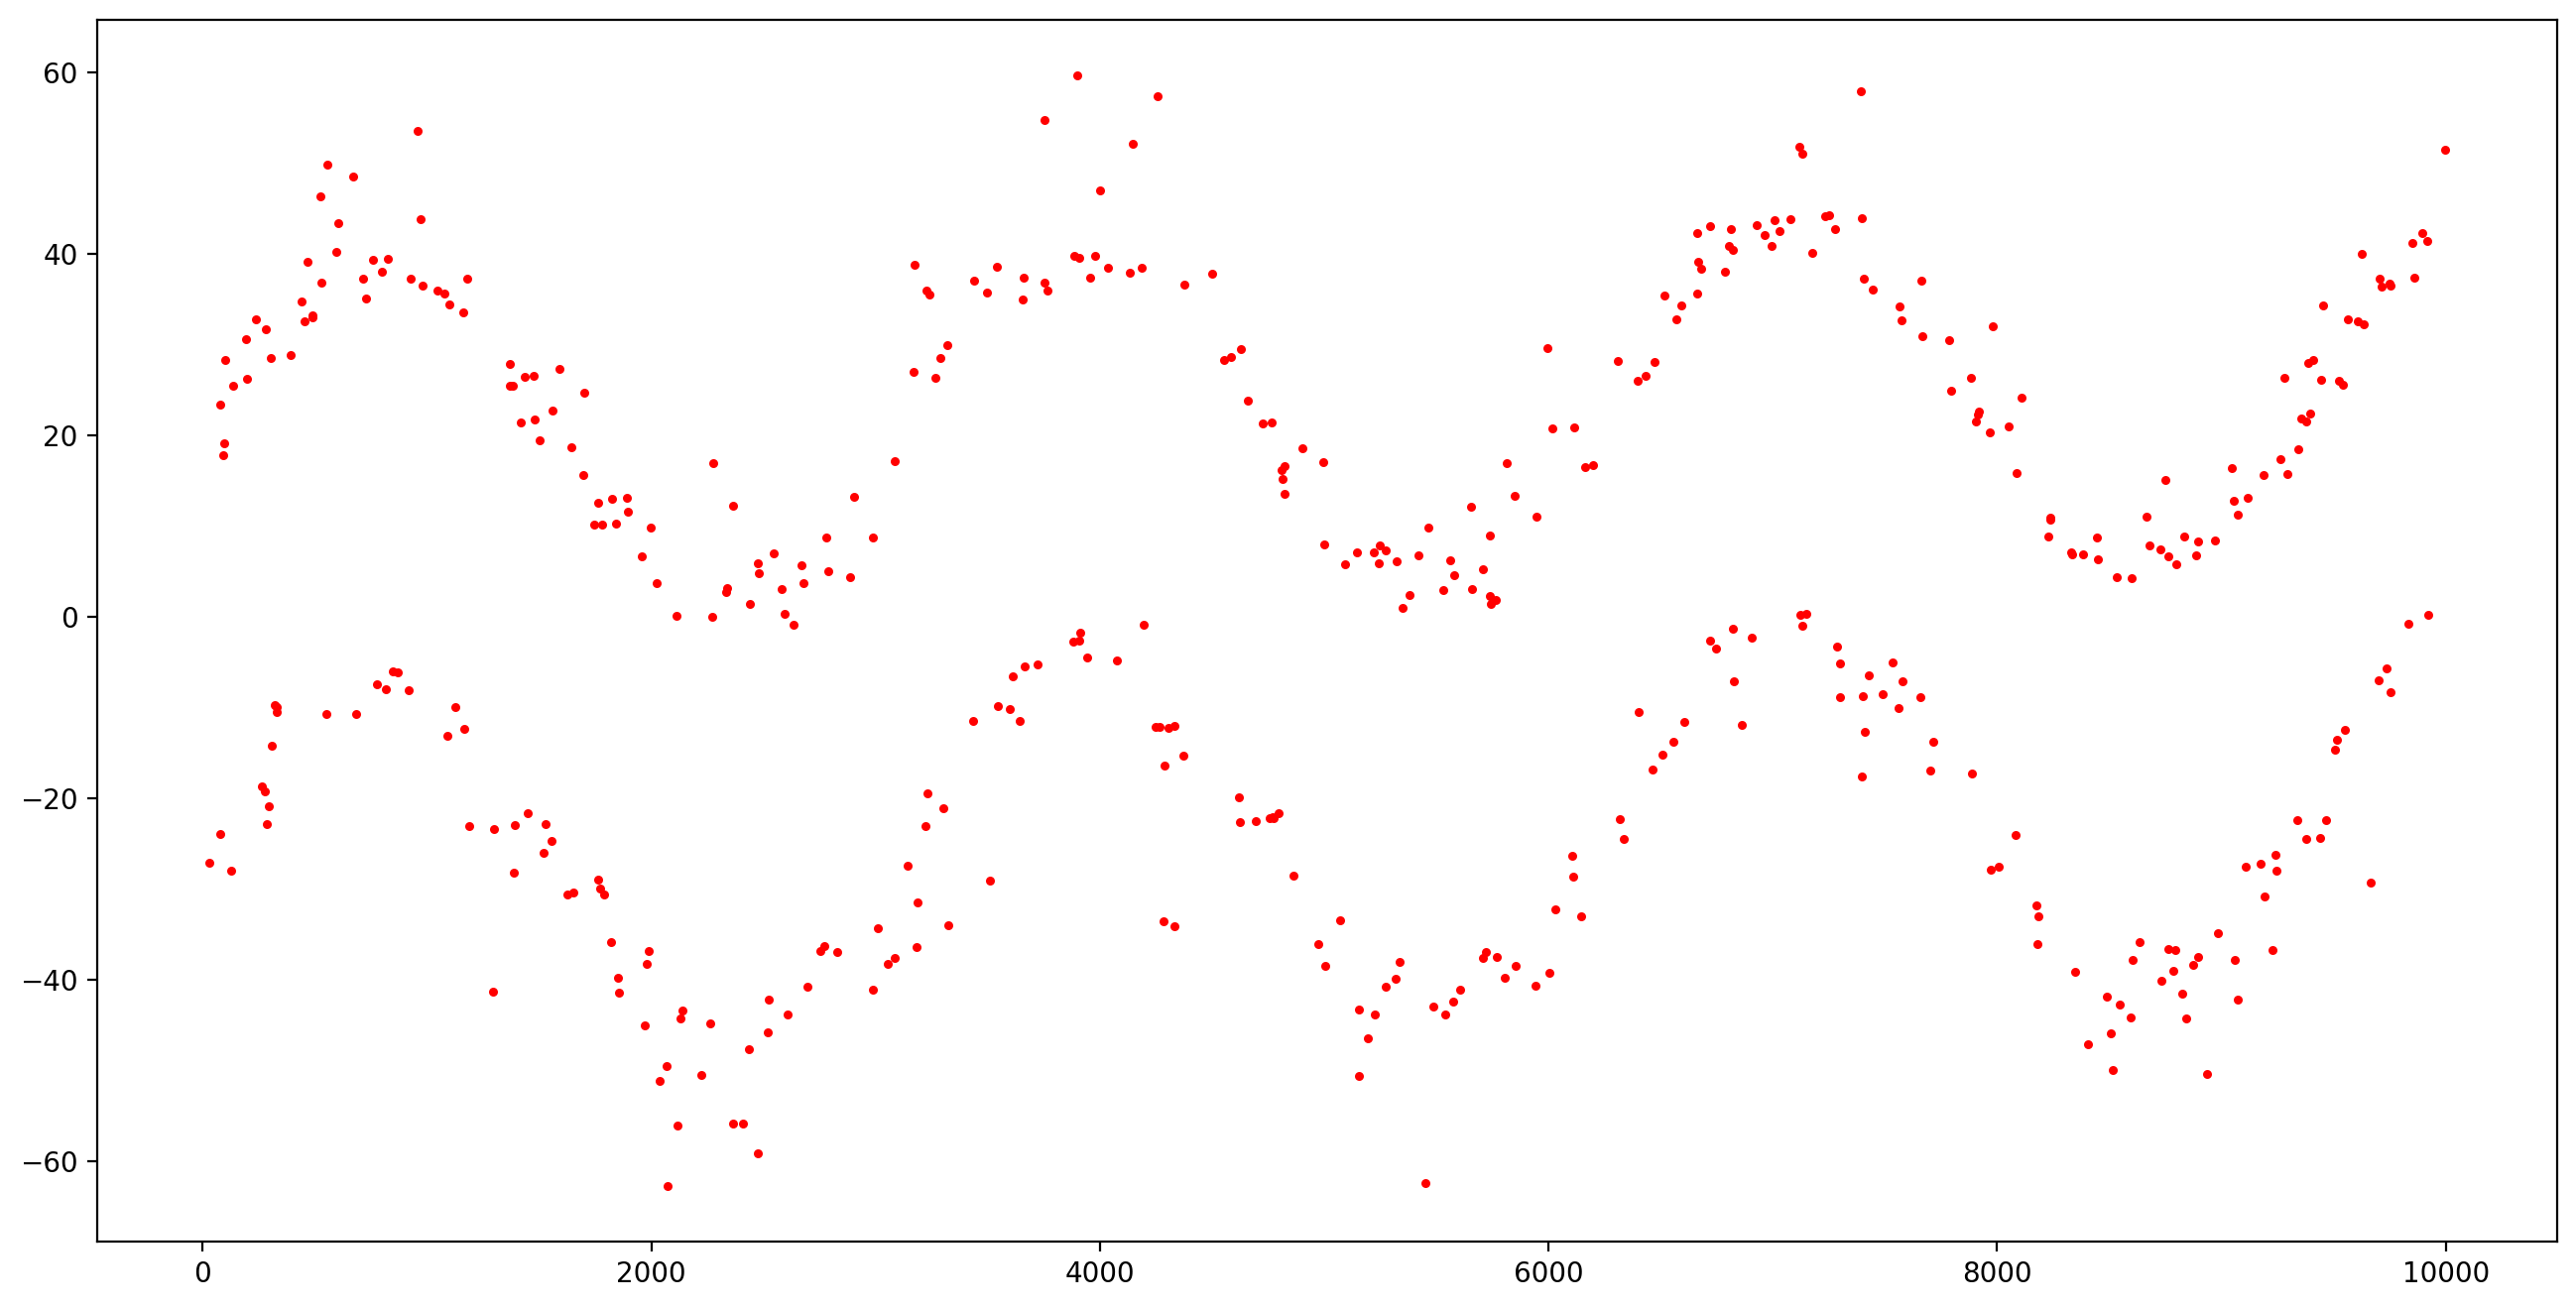

In [63]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(dataset_outliers.size, dtype='float64'),
            dataset_outliers, s=5, label='Данные попавшие под выброс', color='red')

---

## Попытки найти выбросы через DBScan

In [64]:
from sklearn.cluster import DBSCAN


In [65]:
ee = DBSCAN(eps=0.01, min_samples=3)
yhat = ee.fit_predict((dataset_rot.reshape(-1, 1)))
yhat = np.array(yhat)


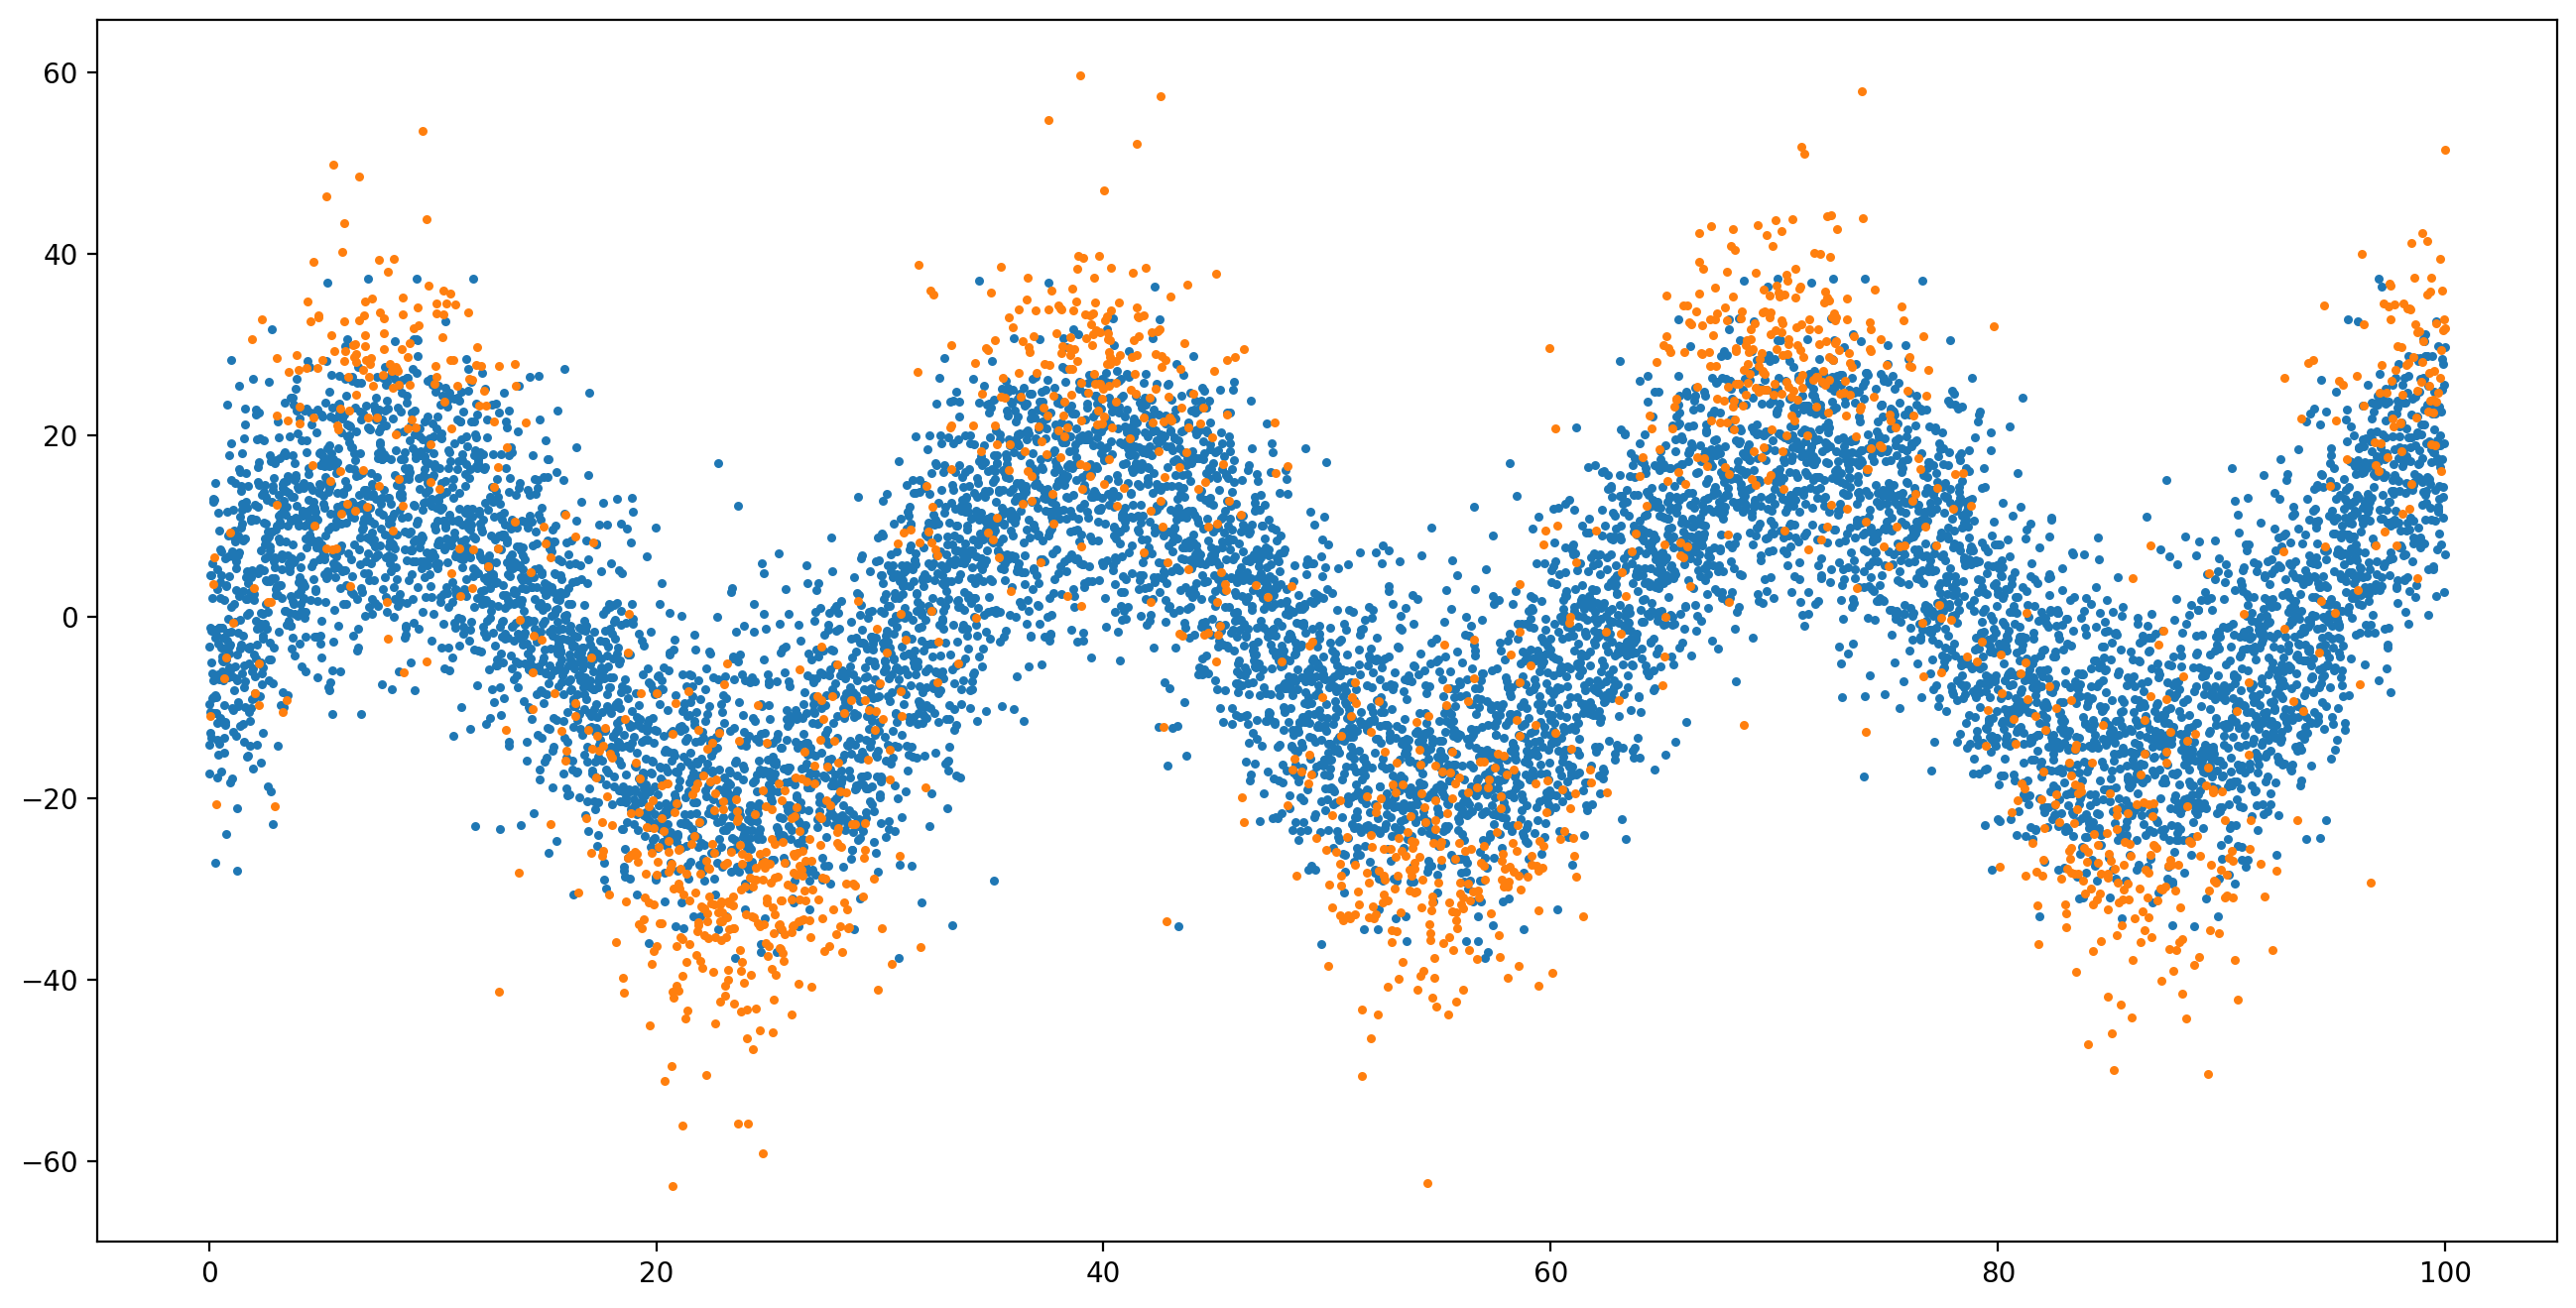

In [66]:
plt.figure(figsize=(16, 8))
plt.scatter(t[yhat >= 0], dataset_rot[yhat >= 0], s=5)
plt.scatter(t[yhat < 0], dataset_rot[yhat < 0], s=5)
